In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0,7.0)

In [65]:
headbrain = pd.read_csv('headbrain.csv')
print(headbrain.shape)
headbrain.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [66]:
# Using Least Square Method

In [67]:
X = headbrain['Head Size(cm^3)'].values
Y = headbrain['Brain Weight(grams)'].values

In [68]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [69]:
# mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

print(' b1: ',b1,'\n','b0: ',b0)

 b1:  0.26342933948939945 
 b0:  325.57342104944223


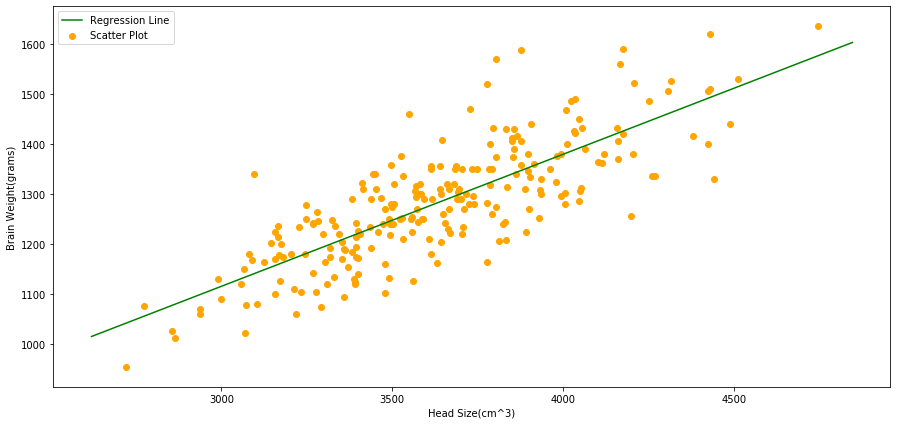

In [70]:
# plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# plotting line
plt.plot(x,y,c='g', label='Regression Line')

# plotting Scatter Points
plt.scatter(X,Y,c='orange', label='Scatter Plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [71]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print('r2:',r2)

r2: 0.6393117199570003


In [72]:
# using sklearn method

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
# cannot use Rank 1 Matrix in scikit learn
X = X.reshape(m,1)

# Creating model
reg = LinearRegression()

# fitting training data
reg = reg.fit(X,Y)

# Y prediction
Y_pred = reg.predict(X)

# calculating r2 score
r2_score = reg.score(X,Y)

print(r2_score)

0.639311719957
